# Задание по теме «1.4. Использование библиотек NumPy, SciPy»

## Импорт библиотек

In [1]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Построение распределений

Сгенерировать выборку с распределением Рэлэя ( https://ru.wikipedia.org/wiki/Распределение_Рэлея ) используя numpy и scipy и построить на основе ее кривую плотности распределения на основе гистограммы из Matplotlib.

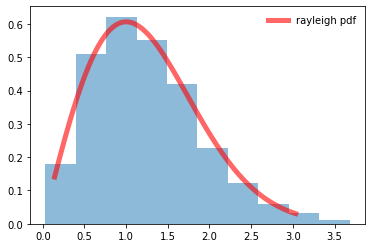

In [123]:
from scipy.stats import rayleigh
fig, ax = plt.subplots(1, 1)

# Находим первые 4 момента
mean, var, skew, kurt = rayleigh.stats(moments='mvsk')

# Отображаем функцию плотности распределения
x = np.linspace(rayleigh.ppf(0.01), rayleigh.ppf(0.99), 100)
ax.plot(x, rayleigh.pdf(x), 'r-', lw=5, alpha=0.6, label='rayleigh pdf')

r = rayleigh.rvs(size=1000) # генерируем выборку 1000 элементов

# Строим гистограмму распределения
ax.hist(r, density=True, histtype='stepfilled', alpha=0.5)
ax.legend(loc='best', frameon=False)

plt.show()

## 2. Построение графика по функции

Сгенерировать массивы по функции (x^2 + y^2 - 1)^3 - x^2 y^3 = 0 и построить на основе них график.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


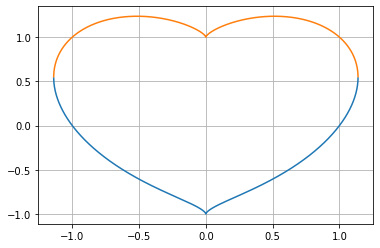

In [107]:
x = np.arange(-2, 2, 0.001)
y1 = 0.5*((x**2)**(1/3)-((x**4)**(1/3)-(4*x**2)+4)**0.5)
y2 = 0.5*((x**2)**(1/3)+((x**4)**(1/3)-(4*x**2)+4)**0.5)
plt.plot(x,y1)
plt.plot(x,y2)
plt.grid()
plt.show()

## 3. Анализ зависимостей

Найти зависимости представленные в датасете приложенном к заданию. Представить в виде графиков в файле формата Notebook. Для анализа используйте графики scatter, plot, hist, bar из matplotlib и функции numpy и scipy. Постарайтесь не использовать pandas и др. библиотеки, не указанные ранее.

In [125]:
# Датасет dataset_home.txt содержит 7 колонок, разделенных запятыми
# 1. Возраст
# 2. Пол
# 3. Индекс массы тела
# 4. Количество детей
# 5. Курит? (yes/no)
# 6. Регион проживания
# 7. Сумма, которую человек тратит на страховки (прогнозируемая величина Y)


# Для начала нам надо собрать данные из нашего текстового файла.
# Для этого создадим ряд обычных списков.
# Мы создаем обычные списки, а не сразу массивы numpy
# так как не знаем размера исходного файла
# В теории можно было бы объявить numpy массивы заданной размерности
# а потом заполнить их. Но мы сейчас пойдем самым примитивным путем
# создадим списки, а потом объединим их в массив numpy

age = []
sex = []
bmi = []
children = []
smoker = []
region = []
spending = []

In [126]:
ls

dataset_home.txt  sample_data/


In [127]:
# Парсинг исходного датасета в списки

with open("./dataset_home.txt", mode = "r") as data:
  for human in data.readlines():
    #print(human)
    # Заполняем список возрастов преобразуя их в целые числа
    age.append(int(human.split(",")[0]))
    
    # Заполняем список полов преобразуя строки в 0 и 1
    if human.split(",")[1] == "male":
      sex.append(1) # если мужчина заносим в список 1
    else:
      sex.append(0) # если женщина заносим в список 0
    
    # Заполняем список ИМТ преобразуя строки в числа с пл. точкой
    bmi.append(float(human.split(",")[2]))

    # Заполняем список кол-ва детей преобразуя их в целые числа
    children.append(int(human.split(",")[3]))

    # Заполняем список признака курильщика преобразуя строки в 0 и 1
    if human.split(",")[4] == "yes":
      smoker.append(1) # если курит заносим в список 1
    else:
      smoker.append(0) # если не курит заносим в список 0
    
    # Заполняем список регионов кодами регионов
    if human.split(",")[5] == "northwest":
      region.append(0) # 0 - northwest
    elif human.split(",")[5] == "northeast":
      region.append(1) # 1 - northeast
    elif human.split(",")[5] == "southwest":
      region.append(2) # 2 - southwest
    elif human.split(",")[5] == "southeast":
      region.append(3) # 3 - southeast
    else:
      region.append(human.split(",")[5]) # Если пропустили регион в условии заносим его как есть 

    # Заполняем список трат на страховки преобразуя строки в числа с пл. точкой
    spending.append(float(human.split(",")[6]))

In [128]:
# Преобразуем полученные списки в nupmy массивы

age = np.array(age)
sex = np.array(sex)
bmi = np.array(bmi)
children = np.array(children)
smoker = np.array(smoker)
region = np.array(region)
spending = np.array(spending)

In [129]:
age.shape # Проверяем форму массива age

(670,)

In [130]:
# Описательные статистики age
age.min(), age.max(), age.mean()

(18, 64, 38.37761194029851)

In [131]:
# Описательные статистики spending
spending.min(), spending.max(), spending.mean()

(1131.5066, 62592.87309, 12899.874326014924)

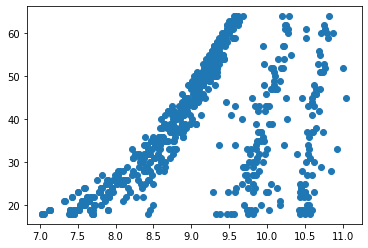

In [132]:
# Построим зависимость spending-age

#plt.scatter(spending, age)
plt.scatter(np.log(spending), age)

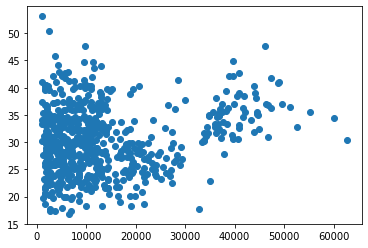

In [133]:
# Построим зависимость spending-bmi

plt.scatter(spending, bmi)
#plt.scatter(np.log(spending), bmi)

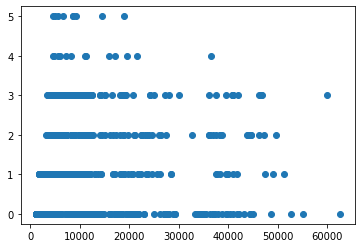

In [134]:
# Построим зависимость spending-количество детей

plt.scatter(spending, children)
#plt.scatter(np.log(spending), children)

<BarContainer object of 670 artists>

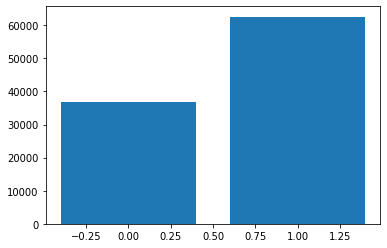

In [135]:
# Построим зависимость spending-smoker
# scatter здесь не подойдет, построим столбчатый график

plt.bar(smoker, spending)

**Вывод:** у тех, кто не курит расходы на страховку в среднем меньше, чем у курящих

<BarContainer object of 670 artists>

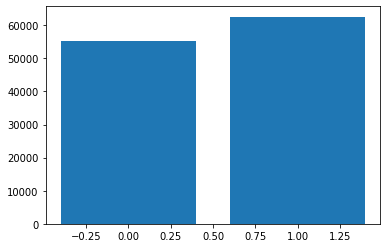

In [136]:
# Построим зависимость sex-smoker
# scatter здесь не подойдет, построим столбчатый график

plt.bar(sex, spending)

**Вывод:** расходы на страхование у мужчин выше, чем у женщин

(array([556., 376., 148.,  76.,  38.,  58.,  48.,  30.,   6.,   4.]),
 array([ 1131.5066  ,  7277.643249, 13423.779898, 19569.916547,
        25716.053196, 31862.189845, 38008.326494, 44154.463143,
        50300.599792, 56446.736441, 62592.87309 ]),
 <a list of 10 Patch objects>)

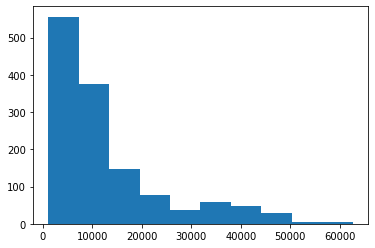

In [ ]:
# Построим гистограмму для spending

plt.hist(spending)

**Вывод:** превалируют значения до 10000

In [ ]:
# Посмотрим распределение выборки по возрастам

age[age<36].shape # Количество людей младше 36 лет

(614,)

In [ ]:
age[age>35][age[age>35]<56].shape # Количество людей от 35 до 56 лет

(538,)

In [ ]:
age[age>55].shape # Количество людей старше 55 лет

(188,)

**Вывод:** в выборке преобладают молодые люди и люди среднего возраста

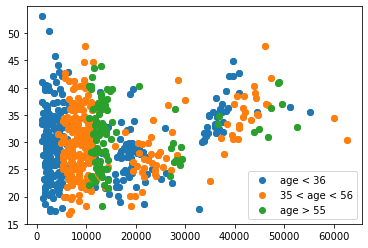

In [ ]:
# Построим зависимости spending-bmi в разарезе возрастных групп

plt.scatter(spending[age<36], bmi[age<36], label = "age < 36")
plt.scatter(spending[age>35][age[age>35]<56], bmi[age>35][age[age>35]<56], label = "35 < age < 56")
plt.scatter(spending[age>55], bmi[age>55], label = "age > 55")
plt.legend()
plt.show()


**Вывод:** у людей в возрастной группе 55+ стоимость страховки намного выше.

(array([ 54., 160., 258., 306., 284., 158.,  88.,  22.,   6.,   4.]),
 array([16.815 , 20.4465, 24.078 , 27.7095, 31.341 , 34.9725, 38.604 ,
        42.2355, 45.867 , 49.4985, 53.13  ]),
 <a list of 10 Patch objects>)

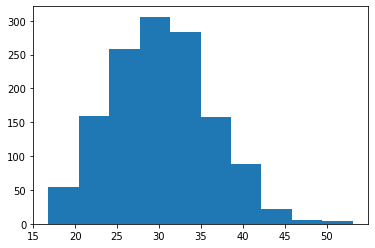

In [ ]:
# Построим гистограмму распределения веса (bmi)

plt.hist(bmi)

**Вывод:** распределени bmi близко к нормальному

In [ ]:
# Построим распределения bmi по группам

bmi[bmi<23].shape # Количество людей c bmi меньше 23

(152,)

In [ ]:
bmi[bmi>22][bmi[bmi>22]<38].shape # Количество людей c bmi от 22 до 38

(1100,)

In [ ]:
bmi[bmi>37].shape # Количество людей с bmi больше 37

(176,)

**Вывод:** в выборке преобладают люди с bmi от 22 до 38

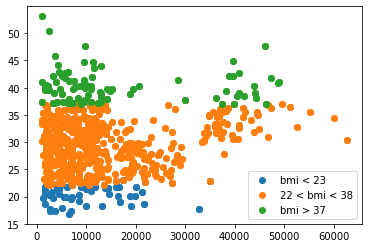

In [ ]:
# Построим зависимости spending-bmi в разарезе групп по bmi

plt.scatter(spending[bmi<23], bmi[bmi<23], label = "bmi < 23")
plt.scatter(spending[bmi>22][bmi[bmi>22]<38], bmi[bmi>22][bmi[bmi>22]<38], label = "22 < bmi < 38")
plt.scatter(spending[bmi>37], bmi[bmi>37], label = "bmi > 37")
plt.legend()
plt.show()


**Вывод:** траты на страховку у людей с повышенным и высоким bmi существенно выше